# Distribución de colores UV

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
import median_cut
from math import sqrt
import pandas as pd

## 1. Cargar imagen

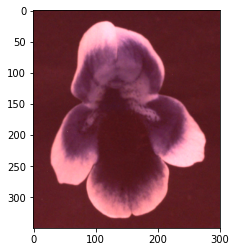

(350, 301, 3)

In [70]:
image = imread('img/f2_UV_brillo.png')
im_read = image[:,:,0:3]
plt.imshow(im_read)
plt.show()
im_read.shape



#image = imread('img/f4_UV_brillo.png')
#im_read2 = image[:,:,0:3]
#plt.imshow(im_read2)
#plt.show()
#im_read2.shape

## 2. Escala de grises

Al parecer la mejor transfomación a grises es LUMA

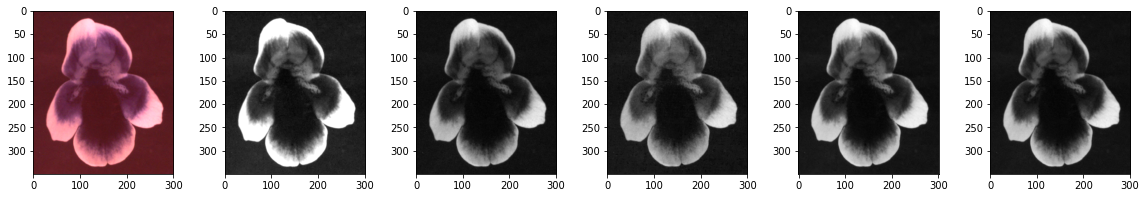

In [44]:
Ar = im_read[:,:,0]
Ag = im_read[:,:,1]
Ab = im_read[:,:,2]

imgLum=(im_read[:,:,0]*.2126+im_read[:,:,1]*.7152+im_read[:,:,2]*.0722)
imgProm=(im_read[:,:,0]/3+im_read[:,:,1]/3+im_read[:,:,2]/3)


plt.figure(figsize=(20, 3))
plt.subplot(1, 6, 1)
plt.imshow(im_read)
plt.subplot(1, 6, 2)
plt.imshow(Ar, cmap="gray")
plt.subplot(1, 6, 3)
plt.imshow(Ag, cmap="gray")
plt.subplot(1, 6, 4)
plt.imshow(Ab, cmap="gray")
plt.subplot(1, 6, 5)
plt.imshow(imgProm, cmap="gray")
plt.subplot(1, 6, 6)
plt.imshow(imgLum, cmap='gray')
plt.show()

## 3. Armar threshold

In [45]:
#255>th1>th2>0 
#th1 y th1 pares
th1=146
th2=72

#valores=[(255-th1)/2 + th1,th1 + (th1-th2)/2,th2/2]
valores=[255,th1,th2]
reflexion=["alta","media","baja"]

#im_read= imgLum


In [46]:
clustered_image = np.zeros(imgLum.shape[0]*imgLum.shape[1],dtype=int)
i=0
for alto in range(imgLum.shape[0]):
    for largo in range(imgLum.shape[1]):
        if imgLum[alto,largo] != 0:
            if imgLum[alto,largo] >= th1:
                #clustered_image[i] = (255-th1)/2 + th1
                clustered_image[i] = 0
            elif imgLum[alto,largo] >= th2:
                #clustered_image[i]=th1 + (th1-th2)/2
                clustered_image[i]=1
            else:
                #clustered_image[i]=th2/2
                clustered_image[i]=2
        else:
            clustered_image[i]=100
        i+=1

In [47]:
clustered_image

array([2, 2, 2, ..., 2, 2, 2])

(350, 301)


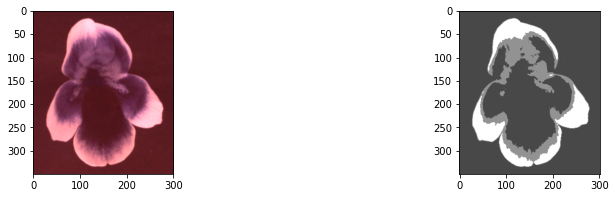

In [68]:
imagen=imgLum.copy()
print(imagen.shape)
i=0
for alto in range(imagen.shape[0]):
    for largo in range(imagen.shape[1]):
        #print(imgLum[alto,largo])
        if imagen[alto,largo] != 0:
            imagen[alto,largo]=valores[clustered_image[i]]
            #print(valores[clustered_image[i]])
        i+=1
        
        
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.imshow(im_read)
plt.subplot(1, 2, 2)
plt.imshow(imagen,cmap='gray', vmin=0, vmax=255)        
plt.show()

## 4. Calcular distribución

In [50]:
#contar = [0,0,0,0,0,0,0,0,0] #sin negro
contar = [0,0,0,0] #con negro
for i in clustered_image:
    #print(i)
    if i == 100:
        contar[-1]+=1
    else:
        contar[i]+=1
contar

contar_p=np.float_(contar[:-1])/np.float_(sum(contar[:-1]))*100
contar_p

array([11.65638348, 12.92833412, 75.41528239])

In [71]:
cluster_aux=[]
for label in reflexion:
    cluster_aux.append([valores[reflexion.index(label)],valores[reflexion.index(label)],valores[reflexion.index(label)]])
#cluster_aux

[[255. 255. 255.]
 [146. 146. 146.]
 [ 72.  72.  72.]]


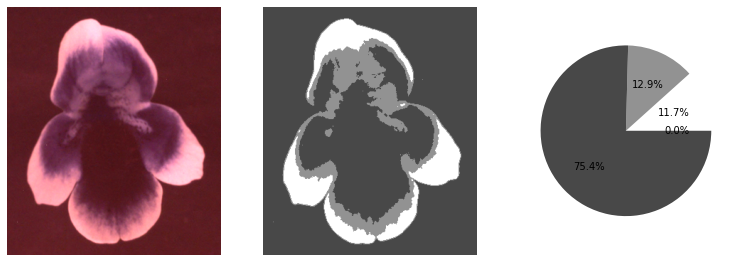

In [69]:
clusters=np.float_(cluster_aux)
print(clusters)
#clusters=(cluster_aux)
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(131) 
ax2 = fig.add_subplot(132)  
ax3 = fig.add_subplot(133)
ax1.imshow(im_read)
ax1.axis('off')
ax2.imshow(imagen,cmap='gray', vmin=0, vmax=255)  
ax2.axis('off')
ax3.pie(contar,colors=np.array(clusters/255),autopct="%1.1f%%")
plt.show()

In [53]:
pd.DataFrame([contar_p],columns=reflexion,index=range(3))

pd.DataFrame([contar_p, [50,50,0],[25,25,0],[10,20,10]],columns=reflexion,index=range(4))


alta      media       baja
0  11.656383  12.928334  75.415282
1  50.000000  50.000000   0.000000
2  25.000000  25.000000   0.000000
3  10.000000  20.000000  10.000000